Notebook to check that data wrangling in lorenz.py was done properly. 

### imports

In [7]:
# ipython extension to autoreload imported modules so that any changes will be up to date before running code in this nb
%load_ext autoreload 
%autoreload 2

# libraries
import numpy as np
import matplotlib.pyplot as plt
from Lorenz96_plotter import plot_Lorenz96
from lorenz import run_Lorenz96_2coupled, lorenzDataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### configurations

In [32]:
dataset = lorenzDataset(n_samples=30,
input_steps=100,
output_steps=1,
min_buffer=19,
rand_buffer=False,
K=36,
F=8,
c=10,
b=10,
h=1,
coupled=True,
time_resolution=0.01,
seed=42)

In [ ]:
# check the adjacency matrix
dataset.a.todense()

matrix([[1., 1., 0., ..., 0., 0., 1.],
        [1., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 1., 1., 0.],
        [0., 0., 0., ..., 1., 1., 1.],
        [1., 0., 0., ..., 0., 1., 1.]])

In [ ]:
print(dataset[1])
print(dataset[1].x.shape)
print(dataset[1].y.shape)
print(dataset[1].t_X.shape)
print(dataset[1].t_Y.shape)

Graph(n_nodes=36, n_node_features=200, n_edge_features=None, n_labels=1)
(36, 200)
(36, 1)
(100,)


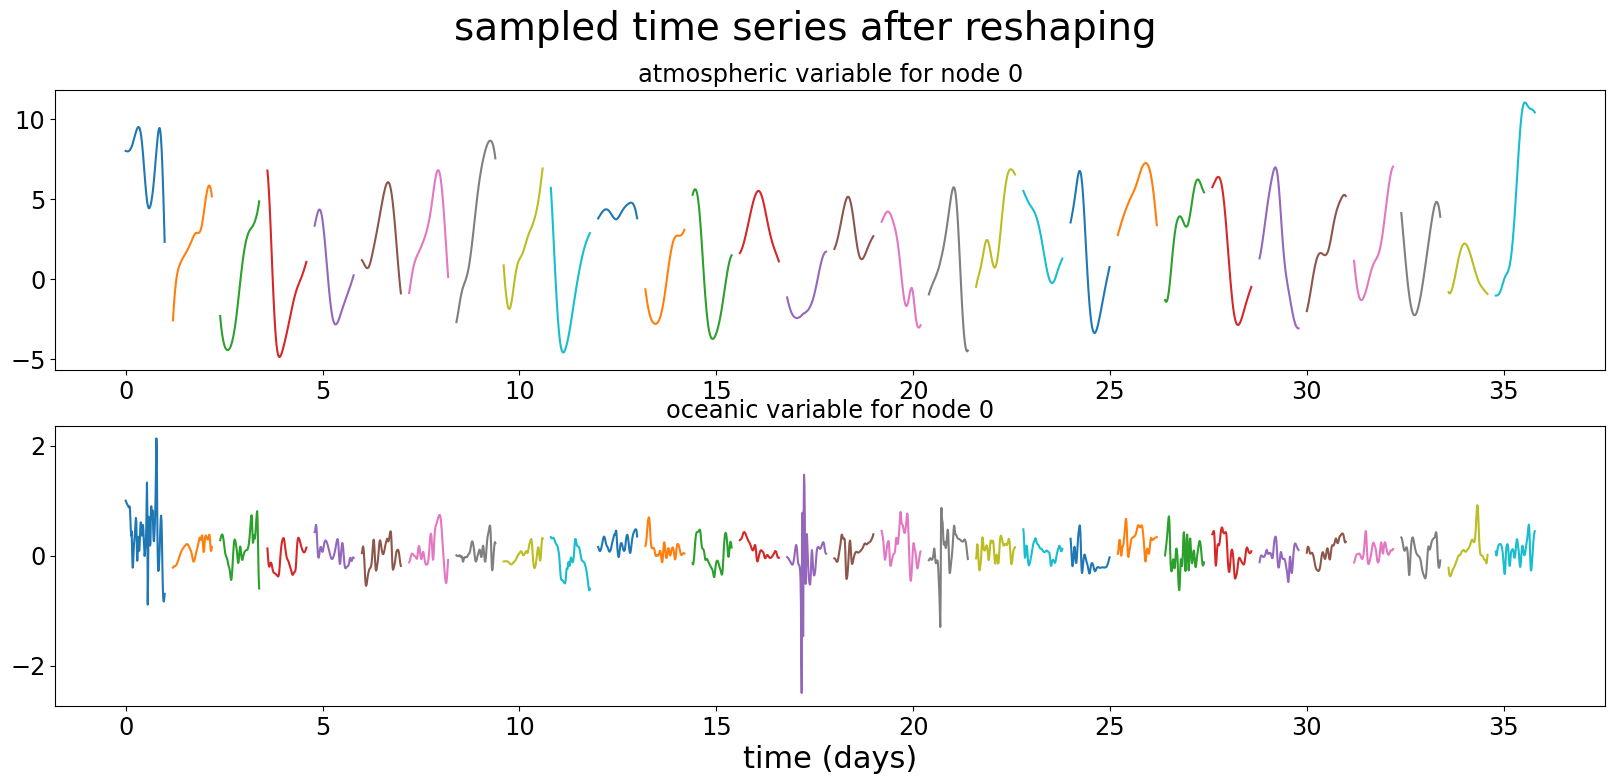

In [31]:
fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(20,8))
node = 0
for g in dataset:
    ax0.plot(g.t_X, g.x[node][:dataset.input_steps])
    ax1.plot(g.t_X, g.x[node][dataset.input_steps:])

fig.suptitle("sampled time series after reshaping",size=28)
ax0.set_title("atmospheric variable for node {}".format(node))
ax1.set_title("oceanic variable for node {}".format(node))
plt.xlabel('time (days)',size=22)
plt.show()

let's compare the samples against the original Lorenz data

First component
Second Component


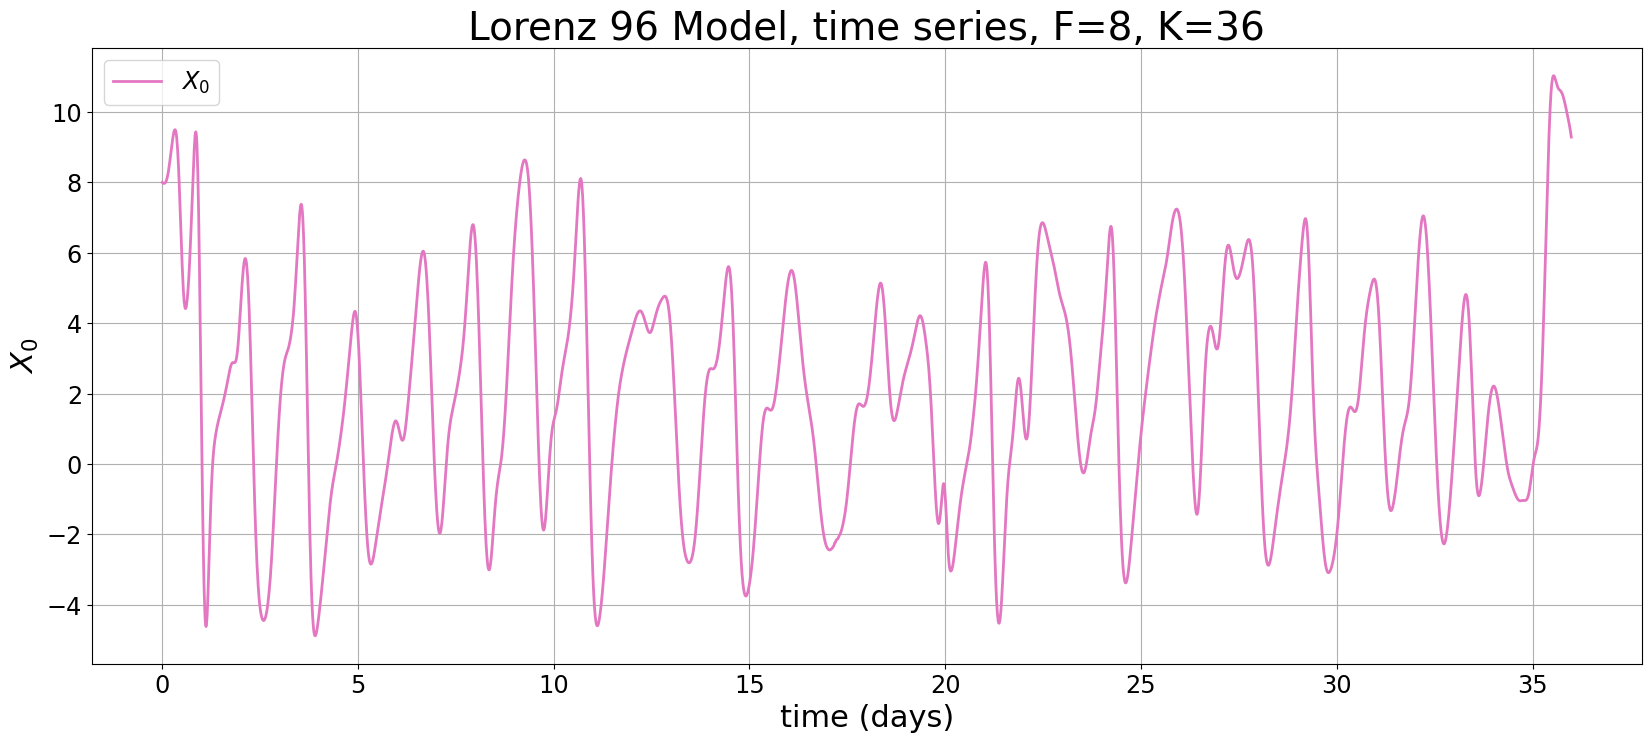

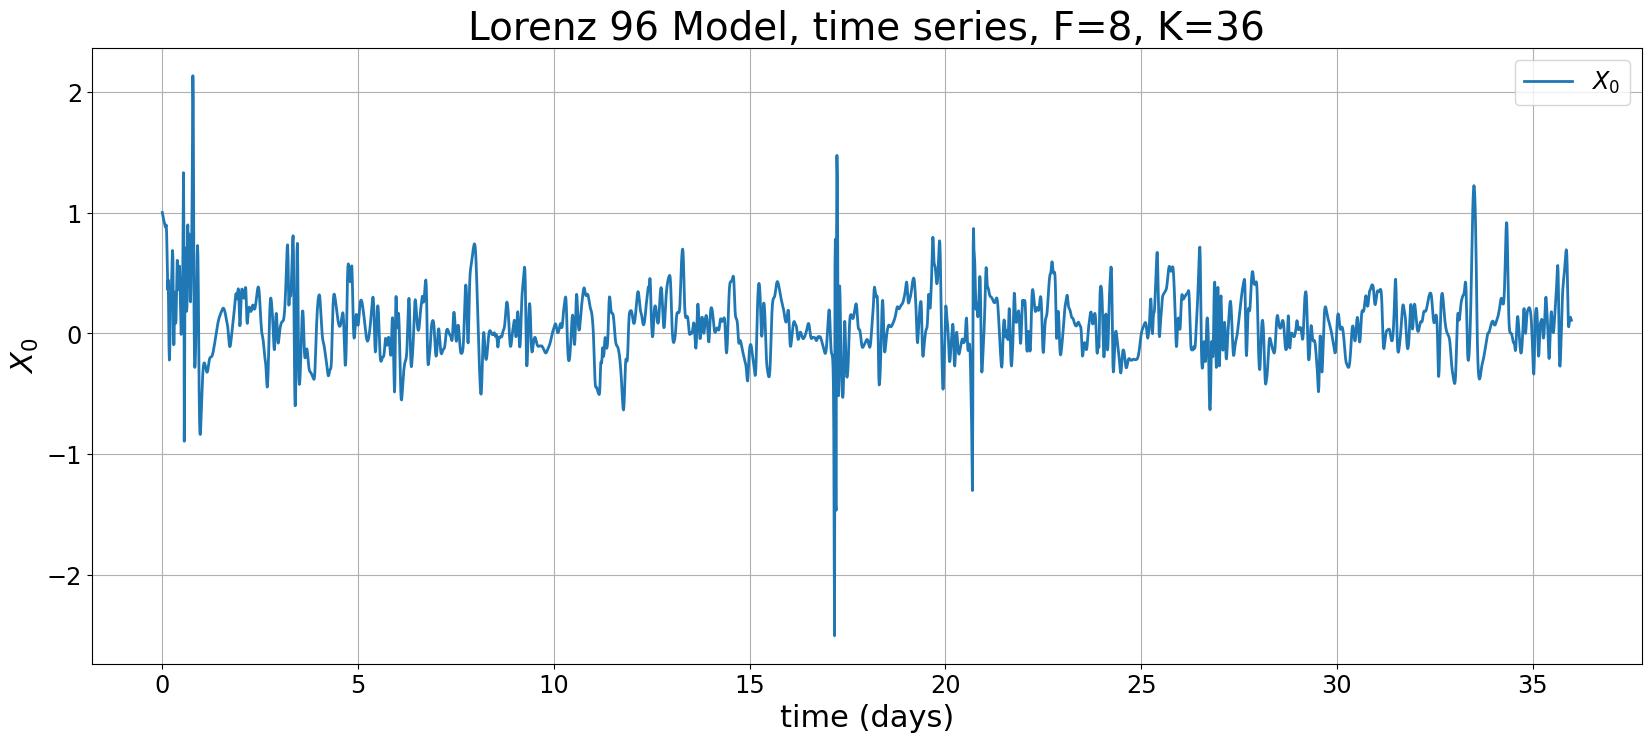

In [33]:
t, X_raw, _, _, _ = run_Lorenz96_2coupled(
K=36,
F=8,
c=10,
b=10,
h=1,
    number_of_days=36,
    seed=42)
plot_Lorenz96(True, False, X_raw, t, F=8, K=36, number_of_days=36)

great! they match. 

questions:
* what if we want to train at multiple time scales? 